<a href="https://colab.research.google.com/github/gunjan238/Brainwave_Matrix_Intern/blob/master/Task2_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install praw
!pip install wordcloud

In [2]:
import praw
import pandas as pd
import nltk

from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [4]:
user_agent = "Reddit_Scrapper 1.0 by /u/Dependent-Lime8507"

reddit = praw.Reddit(
    client_id = "l_BpCGBceyD0lJuxCPe0Qg",
    client_secret = "Hy9I-RHaYRp2EE0TT7Dy79PRRiImZg",
    user_agent = user_agent,
    check_for_async=False
)

In [5]:
headlines = set()

In [6]:
headlines = [] # Initialize as a list
subreddit = reddit.subreddit("worldnews")
for submission in subreddit.hot(limit=5):
    headlines.append(submission.title) # Add titles to the list
headlines = set(headlines)
print(headlines)

{'/r/WorldNews Live Thread: Russian Invasion of Ukraine Day 989, Part 1 (Thread #1136)', 'Biden administration to allow American military contractors to deploy to Ukraine for first time since Russia’s invasion | CNN Politics', '/r/WorldNews Live Thread: Israel at War (Thread #75)', 'Qatar agrees to kick Hamas officials out of Doha', 'Elon Musk joined Trump call with Ukraine’s Zelensky after US election'}


In [7]:
#Labeling data

from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA


#Initialize sentiment analyzer
sia = SIA()
results = []

for line in headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

print(results[:3])

[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'headline': '/r/WorldNews Live Thread: Russian Invasion of Ukraine Day 989, Part 1 (Thread #1136)'}, {'neg': 0.0, 'neu': 0.905, 'pos': 0.095, 'compound': 0.2263, 'headline': 'Biden administration to allow American military contractors to deploy to Ukraine for first time since Russia’s invasion | CNN Politics'}, {'neg': 0.358, 'neu': 0.642, 'pos': 0.0, 'compound': -0.5994, 'headline': '/r/WorldNews Live Thread: Israel at War (Thread #75)'}]


In [8]:
pol_df = pd.DataFrame.from_records(results)
pol_df.head()

,neg,neu,pos,compound,headline
0,0.000,1.000,0.000,0.0000,/r/WorldNews Live Thread: Russian Invasion of ...
1,0.000,0.905,0.095,0.2263,Biden administration to allow American militar...
2,0.358,0.642,0.000,-0.5994,/r/WorldNews Live Thread: Israel at War (Threa...
3,0.000,0.816,0.184,0.2023,Qatar agrees to kick Hamas officials out of Doha
4,0.000,1.000,0.000,0.0000,Elon Musk joined Trump call with Ukraine’s Zel...


In [9]:
pol_df['label'] = 0
pol_df.loc[pol_df['compound'] > 0.2, 'label'] = 1
pol_df.loc[pol_df['compound'] < -0.2, 'label'] = -1
pol_df.head()


,neg,neu,pos,compound,headline,label
0,0.000,1.000,0.000,0.0000,/r/WorldNews Live Thread: Russian Invasion of ...,0
1,0.000,0.905,0.095,0.2263,Biden administration to allow American militar...,1
2,0.358,0.642,0.000,-0.5994,/r/WorldNews Live Thread: Israel at War (Threa...,-1
3,0.000,0.816,0.184,0.2023,Qatar agrees to kick Hamas officials out of Doha,1
4,0.000,1.000,0.000,0.0000,Elon Musk joined Trump call with Ukraine’s Zel...,0


In [10]:
pol_df2 = pol_df[['headline', 'label']]
pol_df2.to_csv('reddit_headlines_labels.csv', mode='a', encoding='utf-8', index=False)


In [11]:
#Dataset Info and Statistics
print("Positive headlines:\n")
print(list(pol_df[pol_df['label'] == 1].headline)[:5])
print("\nNegative headlines:\n")
print(list(pol_df[pol_df['label'] == -1].headline)[:5])

Positive headlines:

['Biden administration to allow American military contractors to deploy to Ukraine for first time since Russia’s invasion | CNN Politics', 'Qatar agrees to kick Hamas officials out of Doha']

Negative headlines:

['/r/WorldNews Live Thread: Israel at War (Thread #75)']


In [12]:
#Let's check total positive and negatives
print(pol_df.label.value_counts())
print(pol_df.label.value_counts(normalize=True) * 100)

label
 0    2
 1    2
-1    1
Name: count, dtype: int64
label
 0    40.0
 1    40.0
-1    20.0
Name: proportion, dtype: float64


<ipython-input-13-097415f5da76>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = counts.index, y = counts, ax = ax, palette = colors)
<ipython-input-13-097415f5da76>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])


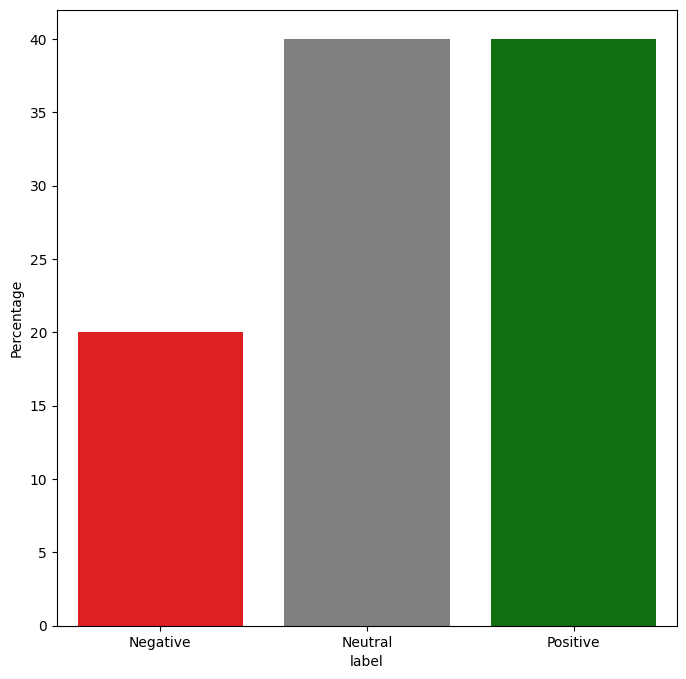

In [13]:
#Bar plot
fig, ax = plt.subplots(figsize=(8, 8))

counts = pol_df.label.value_counts(normalize=True) * 100

colors = ['red', 'gray', 'green']  # Negative, Neutral, Positive

sns.barplot(x = counts.index, y = counts, ax = ax, palette = colors)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [14]:
#Tokenizers and stopwords
from nltk.tokenize import word_tokenize,  RegexpTokenizer
from nltk.corpus import stopwords


stop_words = stopwords.words('english')
# Tokenize and filter each headline
filtered_headlines = []  # Store results for each headline
for headline in headlines:
    words = word_tokenize(headline)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_headlines.append(filtered_words)

print(filtered_headlines)  # Output the filtered headlines


[['/r/WorldNews', 'Live', 'Thread', ':', 'Russian', 'Invasion', 'Ukraine', 'Day', '989', ',', 'Part', '1', '(', 'Thread', '#', '1136', ')'], ['Biden', 'administration', 'allow', 'American', 'military', 'contractors', 'deploy', 'Ukraine', 'first', 'time', 'since', 'Russia', '’', 'invasion', '|', 'CNN', 'Politics'], ['/r/WorldNews', 'Live', 'Thread', ':', 'Israel', 'War', '(', 'Thread', '#', '75', ')'], ['Qatar', 'agrees', 'kick', 'Hamas', 'officials', 'Doha'], ['Elon', 'Musk', 'joined', 'Trump', 'call', 'Ukraine', '’', 'Zelensky', 'US', 'election']]


In [15]:
tokenizer = RegexpTokenizer(r'\w+')
tokenizer.tokenize('filtered_headlines')

['filtered_headlines']

In [16]:
#Word distribution

def process_text(headlines):
    tokens = []
    for line in headlines:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)

    return tokens

In [17]:
#positive words

pos_lines = list(pol_df[pol_df['label'] == 1].headline)
pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)
pos_freq.most_common(20)


[('biden', 1),
 ('administration', 1),
 ('allow', 1),
 ('american', 1),
 ('military', 1),
 ('contractors', 1),
 ('deploy', 1),
 ('ukraine', 1),
 ('first', 1),
 ('time', 1),
 ('since', 1),
 ('russia', 1),
 ('invasion', 1),
 ('cnn', 1),
 ('politics', 1),
 ('qatar', 1),
 ('agrees', 1),
 ('kick', 1),
 ('hamas', 1),
 ('officials', 1)]

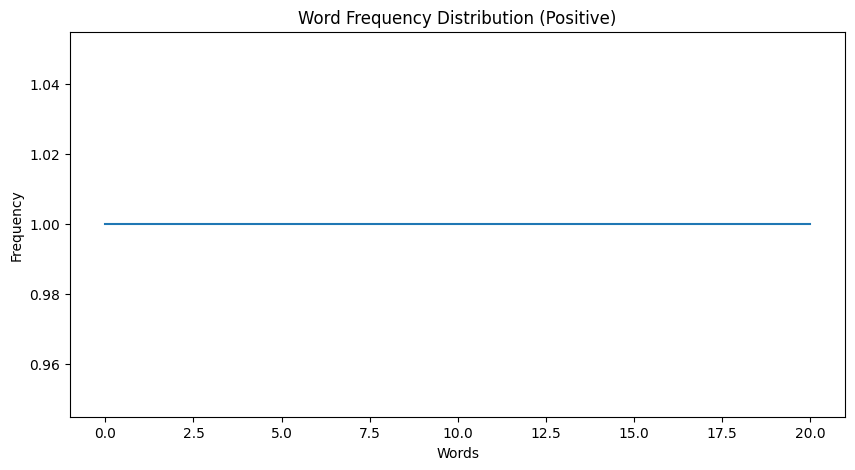

In [18]:
#Plot frequency distribution
y_val = [x[1] for x in pos_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()

In [19]:
neg_lines = list(pol_df2[pol_df2.label == 0].headline)

neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(20)

[('thread', 2),
 ('ukraine', 2),
 ('r', 1),
 ('worldnews', 1),
 ('live', 1),
 ('russian', 1),
 ('invasion', 1),
 ('day', 1),
 ('989', 1),
 ('part', 1),
 ('1', 1),
 ('1136', 1),
 ('elon', 1),
 ('musk', 1),
 ('joined', 1),
 ('trump', 1),
 ('call', 1),
 ('zelensky', 1),
 ('us', 1),
 ('election', 1)]

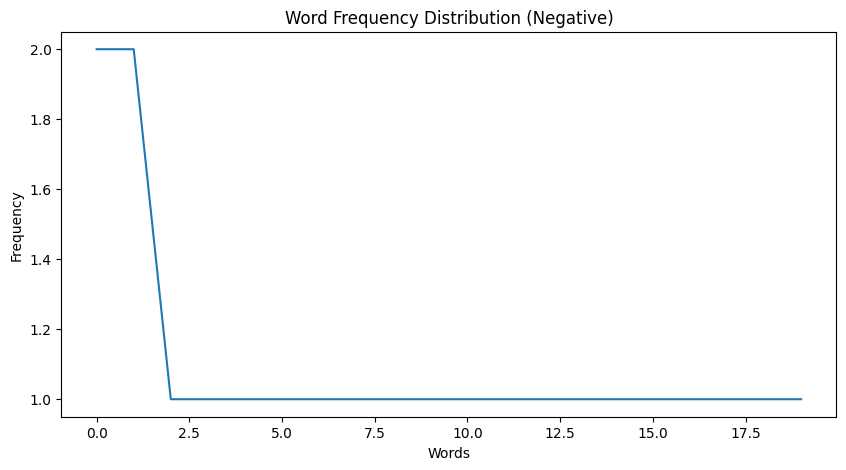

In [20]:
y_val = [x[1] for x in neg_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")
plt.show()

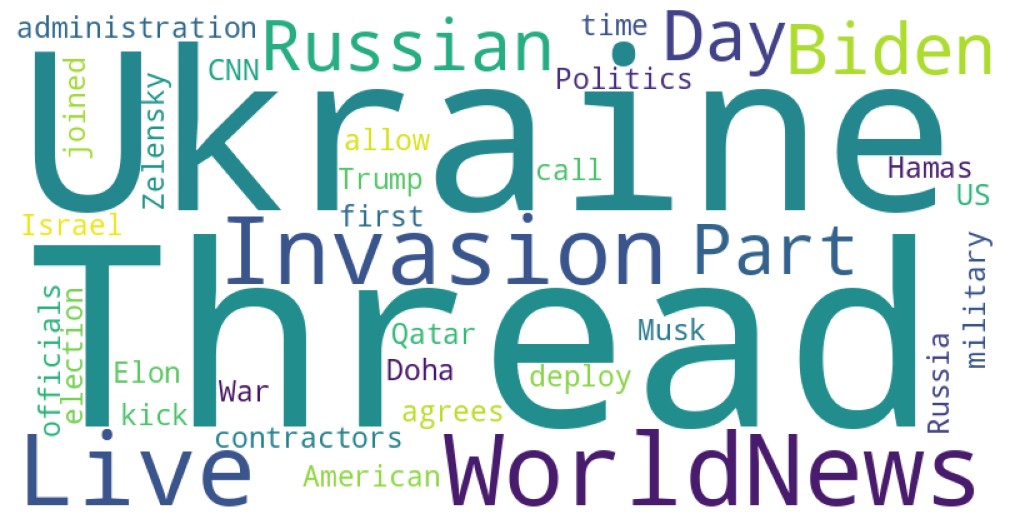

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'filtered_headlines' contains the tokenized and filtered headlines
# Combine all words into a single string
all_words = ' '.join([' '.join(headline) for headline in filtered_headlines])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Display the generated image:
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()